1. iris데이터셋에서 임의의 샘플을 선택.
2. 선택한 샘플의 특성을 유지한채 조금씩 회전 합니다. (특성벡터를 회전행렬과 곱셈)
3. 새로은 회전된 샘플을 데이터셋에 추가.

In [1]:
# Module
import pandas as pd
import numpy as np
import random
import math

In [2]:
# Load Data
iris = pd.read_csv("/kaggle/input/data-iris/iris.csv")
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Target, Feature 구분
iris_feature = iris[
                ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
]

iris_target = iris['Name']

In [4]:
# 데이터 회전 함수 정의

def rotate_sample(sample, angle):
    theta = math.radians(angle)
    rotation_matrix = np.array([
        [math.cos(theta), -math.sin(theta)],
        [math.sin(theta), math.cos(theta)]
    ])
    rotated_sample = np.dot(rotation_matrix, sample) # np.dot은 행렬 곱(배열의 내적)을 계산한다.
    return rotated_sample

In [5]:
# 데이터셋중 SepalLength, SepalWidth를 회전하여 데이터 증강

augmented_feature = []
augmented_target = []

for i in range(len(iris_feature)):
    # 각 샘플마다 회전할 각도를 랜덤으로 선택
    angle = random.uniform(0, 3) 
    rotated_sample = rotate_sample(iris_feature.iloc[i,:2], angle) # 두개의 Feature만 회전 
    augmented_feature.append(rotated_sample)
    augmented_target.append(iris_target[i])

# 증강된 데이터셋 출력
print("원본 데이터 수 :", len(iris_feature))
print("데이터 증강 수 :", len(augmented_feature))

원본 데이터 수 : 150
데이터 증강 수 : 150


In [6]:
augmented_feature[:5]

[array([4.95897574, 3.69710151]),
 array([4.80284088, 3.15320781]),
 array([4.67954897, 3.22983304]),
 array([4.52085839, 3.21431787]),
 array([4.96675803, 3.64572554])]

In [7]:
augmented_target[:5]

['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa']

In [8]:
# 데이터프레임 만들기
df_augmented = pd.DataFrame(augmented_feature, columns=['SepalLength', 'SepalWidth'])
df_augmented

,SepalLength,SepalWidth
0,4.958976,3.697102
1,4.802841,3.153208
2,4.679549,3.229833
3,4.520858,3.214318
4,4.966758,3.645726
...,...,...
145,6.569998,3.274923
146,6.233687,2.661042
147,6.350979,3.303797
148,6.068320,3.629806


### Scatter로 확인해 보기

In [9]:
import matplotlib.pyplot as plt

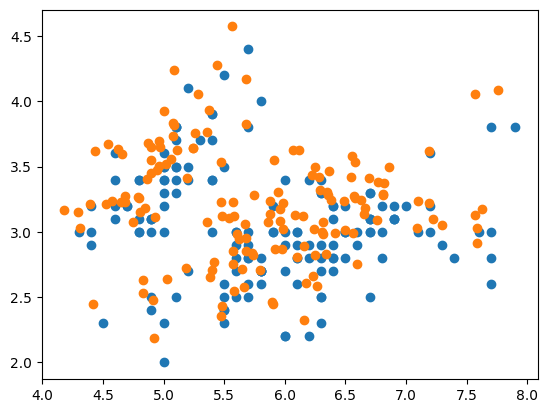

In [11]:
plt.scatter(
    iris_feature['SepalLength'],
    iris_feature['SepalWidth']
)
plt.scatter(
    df_augmented['SepalLength'],
    df_augmented['SepalWidth']
)
plt.show()

---
### 데이터셋중 PetalLength, PetalWidth를 회전하여 데이터 증강

In [12]:
# 데이터셋중 PetalLength, PetalWidth를 회전하여 데이터 증강

augmented_feature = []
augmented_target = []

for i in range(len(iris_feature)):
    # 각 샘플마다 회전할 각도를 랜덤으로 선택
    angle = random.uniform(0, 3) 
    rotated_sample = rotate_sample(iris_feature.iloc[i,2:4], angle) # 두개의 Feature만 회전 
    augmented_feature.append(rotated_sample)
    augmented_target.append(iris_target[i])

# 증강된 데이터셋 출력
print("원본 데이터 수 :", len(iris_feature))
print("데이터 증강 수 :", len(augmented_feature))

원본 데이터 수 : 150
데이터 증강 수 : 150


In [13]:
augmented_feature[:5]

[array([1.39745927, 0.21704284]),
 array([1.39939257, 0.20420683]),
 array([1.29693533, 0.21899489]),
 array([1.49672197, 0.22321142]),
 array([1.39503133, 0.232137  ])]

In [14]:
augmented_target[:5]

['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa']

In [15]:
# DataFrame 만들기
df_augmented2 = pd.DataFrame(augmented_feature, columns =['PetalLength','PetalWidth'])
df_augmented2

,PetalLength,PetalWidth
0,1.397459,0.217043
1,1.399393,0.204207
2,1.296935,0.218995
3,1.496722,0.223211
4,1.395031,0.232137
...,...,...
145,5.123974,2.464729
146,4.972145,1.971745
147,5.181214,2.048176
148,5.334527,2.448023


In [17]:
# Target Column으로 데이터 프레임 만들기
df_target = pd.DataFrame(augmented_target, columns=['Name'])
df_target

,Name
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


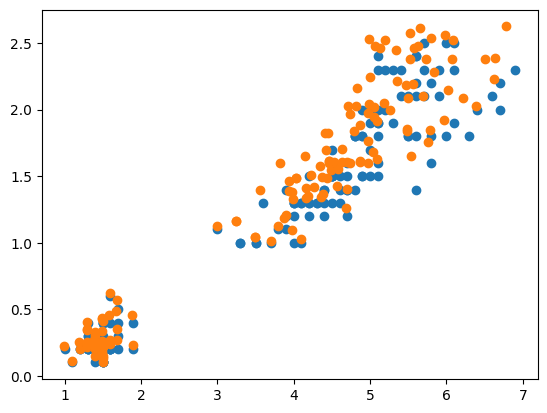

In [19]:
# Scatter로 데이터 분포 비교하기

plt.scatter(
    iris_feature['PetalLength'],
    iris_feature['PetalWidth']
)
plt.scatter(
    df_augmented2['PetalLength'],
    df_augmented2['PetalWidth']
)


plt.show()

### 증강데이터를 데이터프레임으로 만들기

In [20]:
data2 = pd.concat([df_augmented, df_augmented2, df_target], axis='columns')
data2.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,4.958976,3.697102,1.397459,0.217043,Iris-setosa
1,4.802841,3.153208,1.399393,0.204207,Iris-setosa
2,4.679549,3.229833,1.296935,0.218995,Iris-setosa
3,4.520858,3.214318,1.496722,0.223211,Iris-setosa
4,4.966758,3.645726,1.395031,0.232137,Iris-setosa


In [21]:
data2.tail()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
145,6.569998,3.274923,5.123974,2.464729,Iris-virginica
146,6.233687,2.661042,4.972145,1.971745,Iris-virginica
147,6.350979,3.303797,5.181214,2.048176,Iris-virginica
148,6.068320,3.629806,5.334527,2.448023,Iris-virginica
149,5.746466,3.284528,5.045401,1.947800,Iris-virginica


---
### 원본 데이터를 머신러닝 적용

In [23]:
# Train과 Test로 분리

from sklearn.model_selection import train_test_split

train_data, test_data, train_label, test_label = train_test_split(
                                                    iris_feature,
                                                    iris_target,
                                                    random_state=42,
                                                    stratify=iris_target
)

In [24]:
# 데이터 학습하고 예측하기
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(train_data, train_label)
pre = clf.predict(test_data)

In [25]:
# 정답률 구하기
from sklearn import metrics

ac_score = metrics.accuracy_score(test_label, pre)
cl_report = metrics.classification_report(test_label, pre)

print("정확도 =", ac_score)
print("Report = \n", cl_report)

정확도 = 0.8947368421052632
Report = 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.80      0.92      0.86        13
 Iris-virginica       0.91      0.77      0.83        13

       accuracy                           0.89        38
      macro avg       0.90      0.90      0.90        38
   weighted avg       0.90      0.89      0.89        38



In [26]:
# Cross Validation
from sklearn import model_selection
scores = model_selection.cross_val_score(clf, iris_feature, iris_target, cv=6)
print('각각의 정답률 :', scores)
print('평균 정답률 :', scores.mean())

각각의 정답률 : [0.96 1.   0.92 0.92 0.92 1.  ]
평균 정답률 : 0.9533333333333333


----
### 증강 데이터를 머신러닝 적용

In [27]:
# Target, Feature 구분
iris_feature = data2[
                ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
]

iris_target = data2['Name']

In [28]:
# Train과 Test 분리하기
train_data, test_data, train_label, test_label = train_test_split(
                                                    iris_feature,
                                                    iris_target,
                                                    random_state=42,
                                                    stratify=iris_target
)

In [29]:
# 학습 시키기
clf = RandomForestClassifier()
clf.fit(train_data, train_label)
pre = clf.predict(test_data)

In [30]:
# 정답률 구하기

ac_score = metrics.accuracy_score(test_label, pre)
cl_report = metrics.classification_report(test_label, pre)

print("정확도 =", ac_score)
print("Report = \n", cl_report)

정확도 = 0.8947368421052632
Report = 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.80      0.92      0.86        13
 Iris-virginica       0.91      0.77      0.83        13

       accuracy                           0.89        38
      macro avg       0.90      0.90      0.90        38
   weighted avg       0.90      0.89      0.89        38



In [31]:
# Cross Validation

scores = model_selection.cross_val_score(clf, iris_feature, iris_target, cv=6)
print('각각의 정답률 :', scores)
print('평균 정답률 :', scores.mean())

각각의 정답률 : [0.96 1.   0.92 0.92 0.92 1.  ]
평균 정답률 : 0.9533333333333333


----
### 원본 + 증강 데이터를 머신러닝 적용

In [34]:
data = pd.concat([iris, data2], axis='rows')
data = data.reset_index(drop=True)
data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
data.tail()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
295,6.569998,3.274923,5.123974,2.464729,Iris-virginica
296,6.233687,2.661042,4.972145,1.971745,Iris-virginica
297,6.350979,3.303797,5.181214,2.048176,Iris-virginica
298,6.068320,3.629806,5.334527,2.448023,Iris-virginica
299,5.746466,3.284528,5.045401,1.947800,Iris-virginica


In [36]:
# Target, Feature 구분
iris_feature = data[
                ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
]

iris_target = data['Name']

In [37]:
# Train과 Test 분리하기
train_data, test_data, train_label, test_label = train_test_split(
                                                    iris_feature,
                                                    iris_target,
                                                    random_state=42,
                                                    stratify=iris_target
)

In [38]:
# 학습 시키기
clf = RandomForestClassifier()
clf.fit(train_data, train_label)
pre = clf.predict(test_data)

In [39]:
# 정답률 구하기

ac_score = metrics.accuracy_score(test_label, pre)
cl_report = metrics.classification_report(test_label, pre)

print("정확도 =", ac_score)
print("Report = \n", cl_report)

정확도 = 0.9333333333333333
Report = 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        25
Iris-versicolor       1.00      0.80      0.89        25
 Iris-virginica       0.83      1.00      0.91        25

       accuracy                           0.93        75
      macro avg       0.94      0.93      0.93        75
   weighted avg       0.94      0.93      0.93        75



In [40]:
# Cross Validation

scores = model_selection.cross_val_score(clf, iris_feature, iris_target, cv=6)
print('각각의 정답률 :', scores)
print('평균 정답률 :', scores.mean())

각각의 정답률 : [0.98 0.94 0.96 1.   0.96 0.98]
평균 정답률 : 0.9700000000000001
